<a href="https://colab.research.google.com/github/victorijsn/imersaodados3/blob/main/20210504_Aula02_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respostas aos desafios da aula 02 - ImersaoDados - Alura
Victor Nunes Toscano

Linkedin: https://www.linkedin.com/in/vntoscano/

Data: 04/05/2021

## Contexto

- Visualizando os dados


## Desafios:

1. Desafio 01: Ordenar o gráfico countplot
2. Desafio 02: Melhorar a visualização alterando tamanho da fonte...
3. Desafio 03: Plotar os histogramas com seaborn
4. Desafio 04: Estudar sobre as estatíticas retornadas no .describe()
5. Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
6. Desafio 06: Fazer outras análises com o boxplot e até com o histograma.
7. Desafio 07: Resumo do que você aprendeu com os dados

Importar a biblioteca [pandas](https://pandas.pydata.org/docs/index.html) a base de dados:

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

In [ ]:
# Importar as bibliotecas de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [ ]:
dados.columns = dados.columns.str.replace('-','_')

### Resposta 01
#### Ordenar o gráfico countplot





In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:5]
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

Fazendo o gráfico e ordenando as barras.

In [ ]:
ordem=dados.query('composto in @cod_compostos')['composto'].value_counts().index

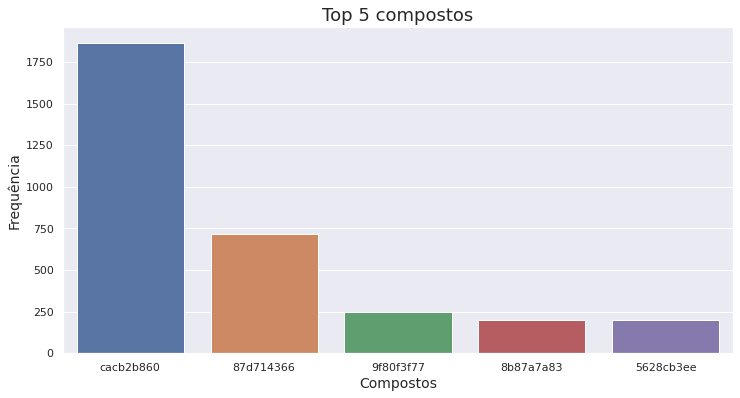

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'),order=ordem)
ax.set_title('Top 5 compostos', fontsize = 18)
ax.set_xlabel('Compostos', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
plt.show()

### Resposta 02
#### Melhorar a visualização alterando tamanho da fonte.

Tá no gráfico acima.



### Resposta 03
#### Plotar os histogramas com seaborn.

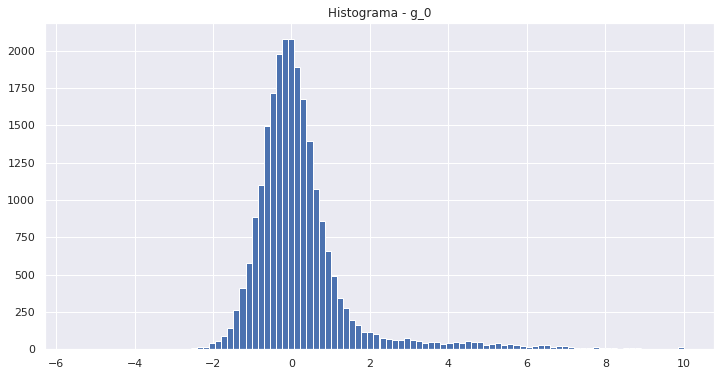

In [ ]:
plt.figure(figsize=(12,6))
dados['g_0'].hist(bins = 100)
plt.title('Histograma - g_0')
plt.show()

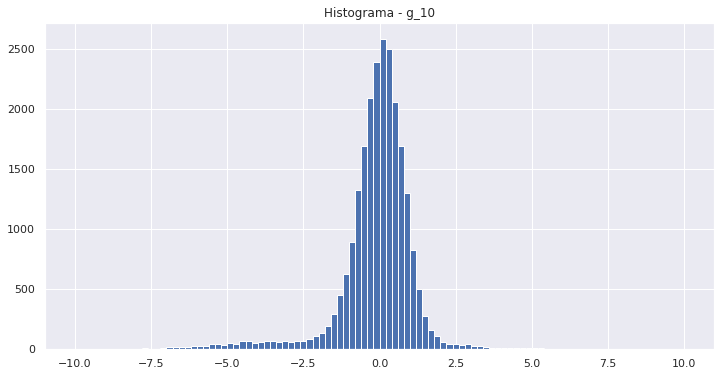

In [ ]:
plt.figure(figsize=(12,6))
dados['g_10'].hist(bins = 100)
plt.title('Histograma - g_10')
plt.show()

Utilizando a forma apresentada pelo colega de imersão, [Pedro Henrique](https://github.com/pedrohnv/imersaodados3/blob/main/imersao_aula02.ipynb), vou gerar dois histogramas que comparam as médias das repostas do tratamento nas células.

In [ ]:
tratamentos = dados['tratamento'].unique()
df = pd.DataFrame({t : dados.query('tratamento == @t').loc[:,'c_0':'c_99'].describe().T['mean'] for t in tratamentos})

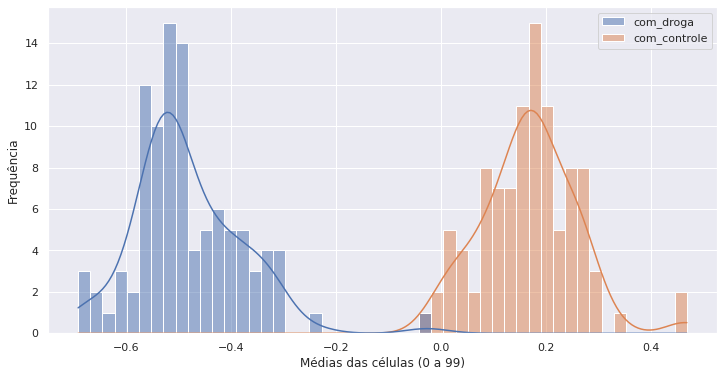

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, kde=True, bins=50)
ax.set_xlabel('Médias das células (0 a 99)')
ax.set_ylabel('Frequência')
plt.show()

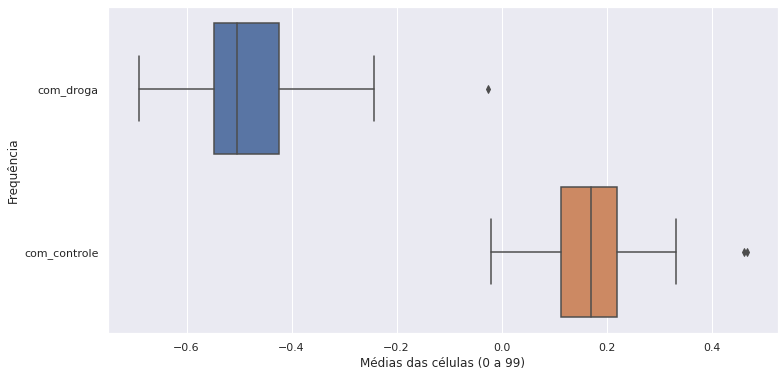

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df, orient = "h")
ax.set_xlabel('Médias das células (0 a 99)')
ax.set_ylabel('Frequência')
plt.show()

### Resposta 04
#### Estudar sobre as estatíticas retornadas no .describe()

As medidas são as estatísticas descritivas já conhecidas.


1. **Count:** É a contagem de observações;
2. **Mean:** É a média das variáveis;
3. **Std:** É o desvio padrão e fornece informações sobre a dispersão dos valores;
4. **Min:** São os valores mínimos dos componentes genéticos;
5. **25%:** Trata-se do primeiro quartil, ou seja, os valores que representam 1/4 da amostra;
6. **50%:** Trata-se da mediana que é aponta a observação que divide a amostra pela metade;
7. **75%:** Trata-se do 3º quartil e divide a amostra 3/4.
8. **Max:** Valor máximo

No caso abaixo, transpomos a base de dados para que verificarmos as estatísticas descritivas dos componentes genéticos como um todo.



In [ ]:
estat_descr = dados.loc[:,'g_0':'g_771'].describe().T
estat_descr

,count,mean,std,min,25%,50%,75%,max
g_0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g_1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g_2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g_3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g_4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g_767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g_768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g_769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g_770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


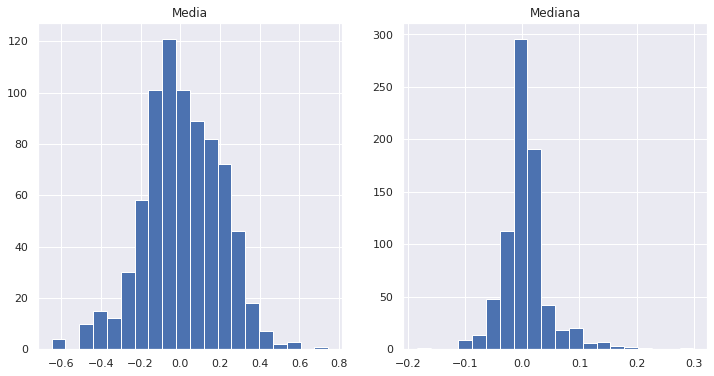

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(estat_descr['mean'], bins=20)
axs[0].set_title('Media')
axs[1].hist(estat_descr['50%'], bins=20)
axs[1].set_title('Mediana')
plt.show()

Comparando os máximos e mínimos é possível notar valores truncados em um intervalo de 10 e -10. Talves, isso possa interferir nos resultados médios.

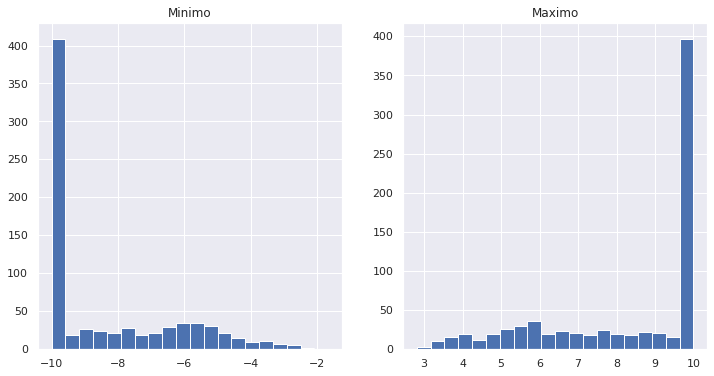

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(estat_descr['min'], bins=20)
axs[0].set_title('Minimo')
axs[1].hist(estat_descr['max'], bins=20)
axs[1].set_title('Maximo')
plt.show()

### Resposta 05
#### Refletir sobre a manipulação do tamanho das visualizações.

Visualização de dados é uma área complexa. A mensagem do gráfico tem que ser direta. Existem muitas formas de representar os dados. Geralmente, utilizo um guia sobre como representar meus gráficos. O site [From data to viz](https://www.data-to-viz.com/) é execente e dá muitas dicas de como criar seus gráficos. Gráficos maiores, geralmente são mais fáceis de observar os padrões apontados pelo pesquisador.

### Resposta 06
#### Fazer outras análises com o boxplot e até com o histograma.

Com a observação de que haviam valores truncados em um intervalor, plotei o boxplot do gene 1 para verificar visualmente se há mudança qualitativa na interpretação dos gráficos.

In [ ]:
dados_filtrados=dados.query("g_1<10 & g_10>-10")

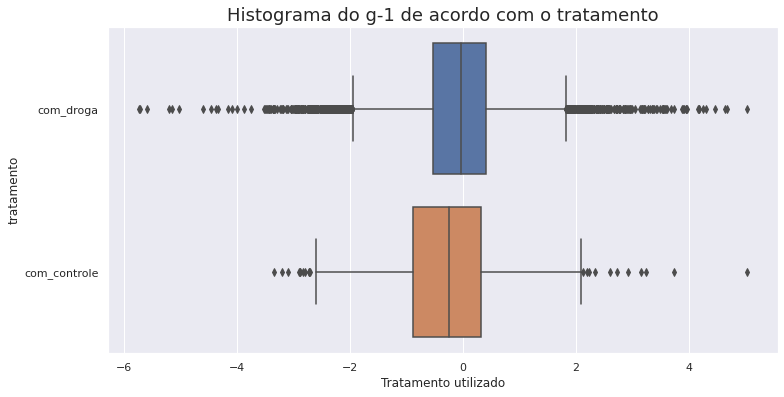

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='tratamento', x= 'g_1', data=dados_filtrados)
plt.title('Boxplot do gene 1 de acordo com o tratamento', fontsize=18)
plt.xlabel('Expressões genéticas', fontsize=12)
plt.show()

Observando em relação às médias gerais temos o seguinte:

In [ ]:
tratamentos = dados['tratamento'].unique()
df = pd.DataFrame({t : dados.query('tratamento == @t').loc[:,'g_0':'g_771'].describe().T['mean'] for t in tratamentos})

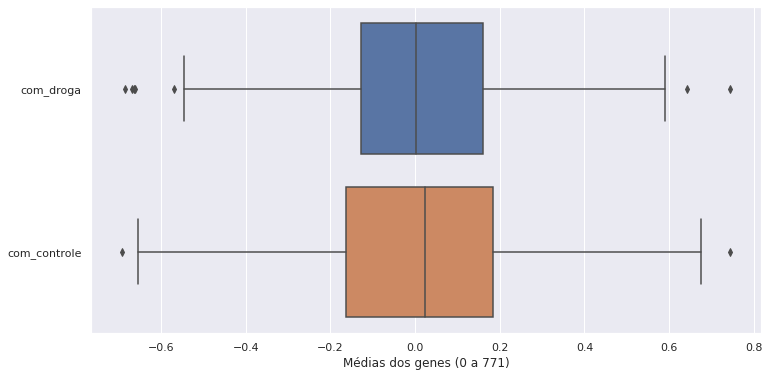

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df, orient='h')
ax.set_xlabel('Médias dos genes (0 a 771)')
plt.show()

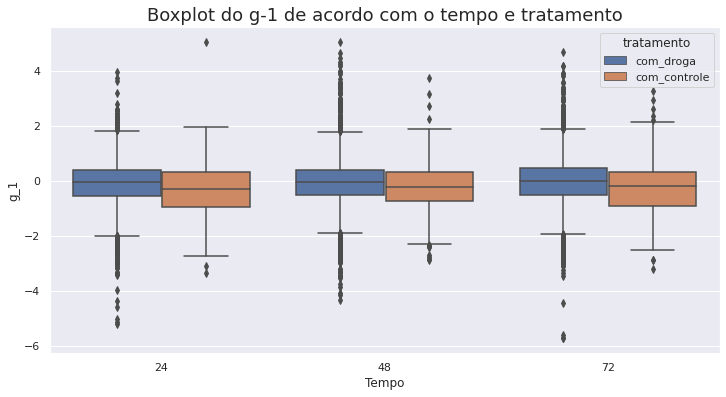

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='g_1', x='tempo', hue='tratamento', data=dados)
plt.title('Boxplot do g-1 de acordo com o tempo e tratamento', fontsize=18)
plt.xlabel('Tempo', fontsize=12)
plt.show()

### Resposta 07
#### Resumo do que você aprendeu com os dados

1. Estamos estudando as cadeias genéticas de células e suas variações molecurares (não sei se to colocando certo) normalizadas dentro do intervalo de -10 a 10;
2. Os dados mostraram uma variabilidade que se aproxima de uma distribuição normal o que pode ser observado nos histogramas dos genes 1  e 10.
3. Também foi possível observar uma diferença no formato da distribuição das médias e das medianas das variações moleculares dos genes de forma geral, com a distribuição das medianas, mais concentradas em valores próximos à zero.
4. Nos boxplots é possível nota a presença de muitos outliers. Tentei tirar os valores truncados, mas sem muito sucesso na observação dos genes.
5. Também pude observar diferenças entre os grupos de tratamento e controle em relação às médias do gene 1. Em geral, tem uma mediana maior em comparação com o grupo de controle, também se comparado com o tempo de administração do composto.

